In [1]:
# import header files
import torch
import torch.nn as nn
import torchvision
import numpy as np

In [2]:
# ✅ REPLACE CELL 2

import os
import numpy as np
from torchvision import datasets, transforms
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Subset

# Define transforms (can also reuse from Cell 10 later)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the ENTIRE dataset (all 4 class folders together)
dataset_path = r"E:\resnet50+cbam\Dataset"
full_dataset = datasets.ImageFolder(dataset_path, transform=transform)

# Extract labels for StratifiedKFold (CPU numpy array, safe for sklearn)
targets = np.array(full_dataset.targets)

# Define KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


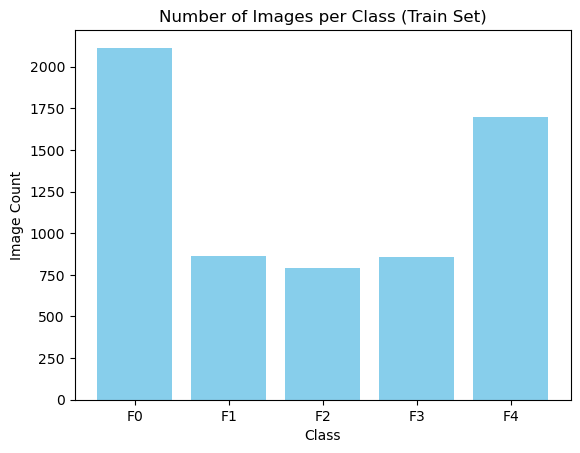

In [3]:
import os
import matplotlib.pyplot as plt

balanced_path = r"E:\resnet50+cbam\Dataset"

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(balanced_path, cls))) 
                for cls in os.listdir(balanced_path)}

plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.title("Number of Images per Class (Train Set)")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()


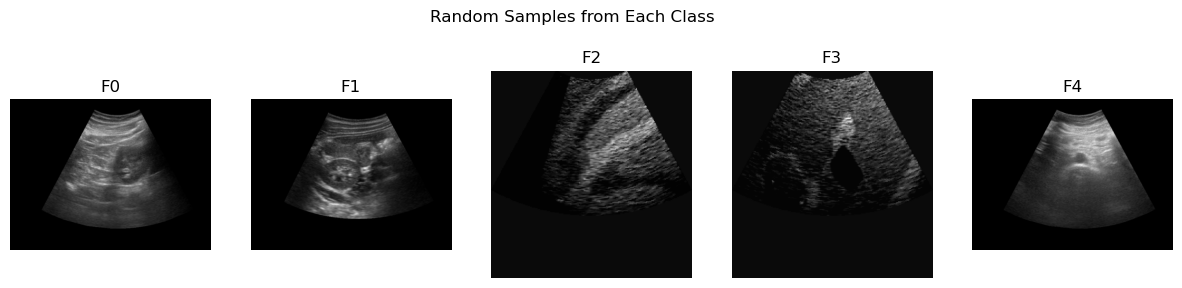

In [4]:
import cv2
import random

rows, cols = 2, 5  # show 2 rows, 5 classes
plt.figure(figsize=(15, 6))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Random Samples from Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


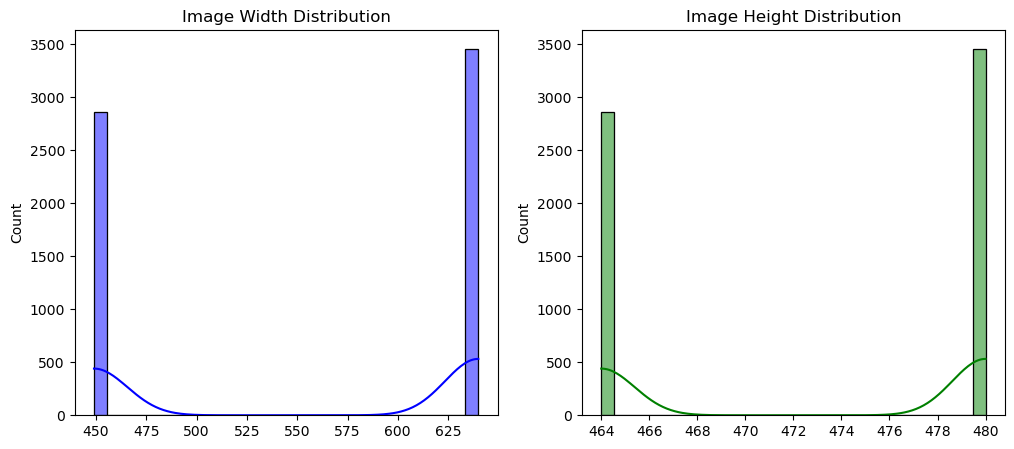

In [5]:
import seaborn as sns

widths, heights = [], []

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w, _ = img.shape
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True, color="blue")
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True, color="green")
plt.title("Image Height Distribution")
plt.show()


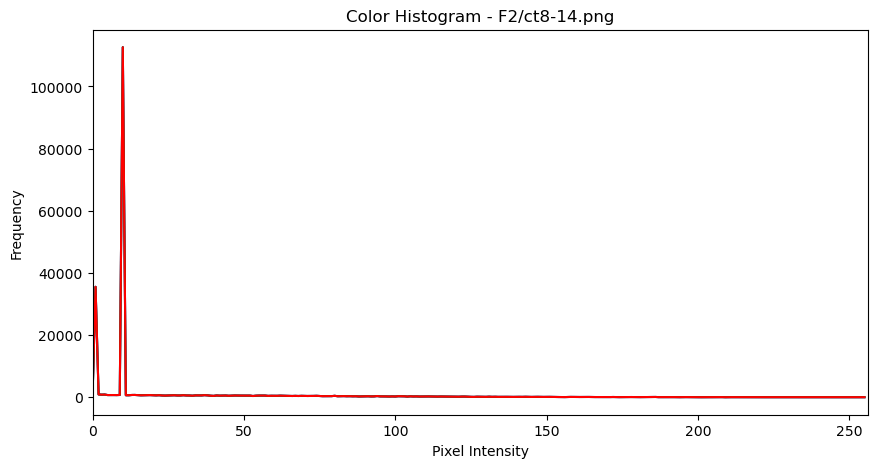

In [6]:
import numpy as np

# Pick random image
cls = random.choice(os.listdir(balanced_path))
img_name = random.choice(os.listdir(os.path.join(balanced_path, cls)))
img_path = os.path.join(balanced_path, cls, img_name)

img = cv2.imread(img_path)
colors = ("b", "g", "r")

plt.figure(figsize=(10,5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title(f"Color Histogram - {cls}/{img_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


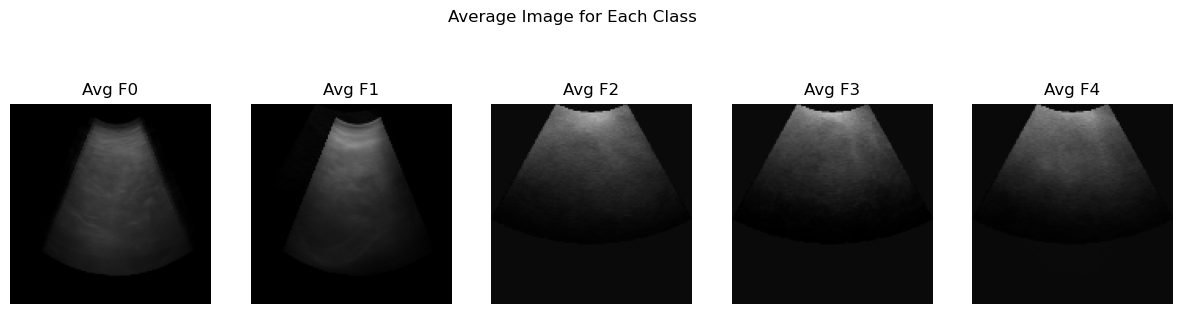

In [7]:
import numpy as np

rows, cols = 1, len(os.listdir(balanced_path))
plt.figure(figsize=(15, 4))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    imgs = []
    
    for img_name in os.listdir(class_dir)[:50]:  # limit to first 50 for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # resize for comparison
        imgs.append(img.astype(np.float32))
    
    mean_img = np.mean(imgs, axis=0).astype(np.uint8)
    mean_img = cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(mean_img)
    plt.title(f"Avg {cls}")
    plt.axis("off")

plt.suptitle("Average Image for Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

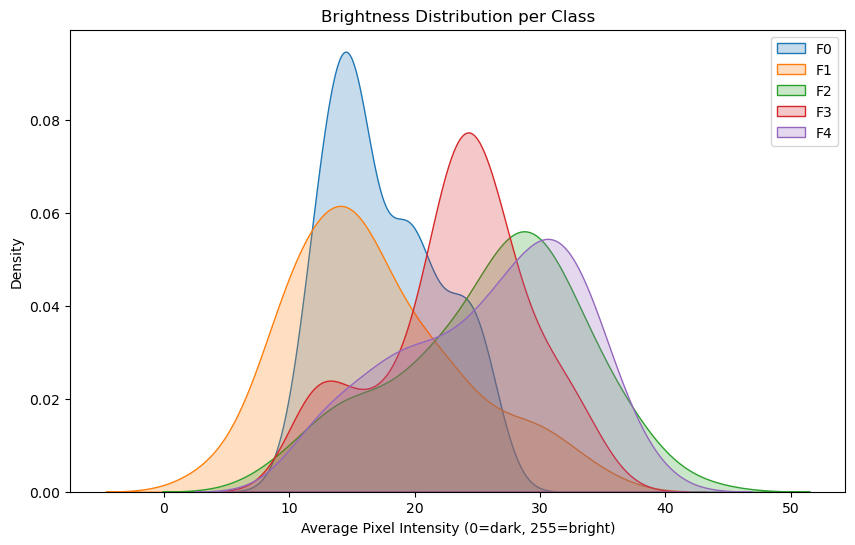

In [8]:
brightness = {}

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    values = []
    
    for img_name in os.listdir(class_dir)[:100]:  # limit for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            values.append(img.mean())
    brightness[cls] = values

plt.figure(figsize=(10, 6))
for cls, values in brightness.items():
    sns.kdeplot(values, label=cls, fill=True)
plt.title("Brightness Distribution per Class")
plt.xlabel("Average Pixel Intensity (0=dark, 255=bright)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [9]:
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)

In [10]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),      # or RandomResizedCrop(224) for training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])



In [11]:
# import torch
# import torch.nn as nn

# class BottleneckBlock(nn.Module):
#     """Bottleneck block with residual connection"""
#     def __init__(self, in_channels, mid_channels, out_channels, stride=1):
#         super().__init__()
        
#         # Main branch
#         self.conv1 = nn.Conv2d(in_channels, mid_channels, 1, bias=False)
#         self.bn1 = nn.BatchNorm2d(mid_channels)
        
#         self.conv2 = nn.Conv2d(mid_channels, mid_channels, 3, stride=stride, padding=1, bias=False)
#         self.bn2 = nn.BatchNorm2d(mid_channels)
        
#         self.conv3 = nn.Conv2d(mid_channels, out_channels, 1, bias=False)
#         self.bn3 = nn.BatchNorm2d(out_channels)
        
#         # Skip connection
#         if stride != 1 or in_channels != out_channels:
#             self.skip = nn.Sequential(
#                 nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False),
#                 nn.BatchNorm2d(out_channels)
#             )
#         else:
#             self.skip = nn.Identity()
            
#         self.relu = nn.ReLU(inplace=True)
    
#     def forward(self, x):
#         identity = self.skip(x)
        
#         out = self.conv1(x)
#         out = self.bn1(out)
#         out = self.relu(out)
        
#         out = self.conv2(out)
#         out = self.bn2(out)
#         out = self.relu(out)
        
#         out = self.conv3(out)
#         out = self.bn3(out)
        
#         out += identity  # Residual connection
#         out = self.relu(out)
        
#         return out

# class ResNet50(nn.Module):
#     def __init__(self, num_classes=5):
#         super().__init__()

#         # Initial conv (stem)
#         self.stem = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
#             nn.BatchNorm2d(64),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
#         )

#         # ResNet-50 layers: [3, 4, 6, 3] blocks
#         self.layer1 = self._make_layer(64, 64, 256, blocks=3, stride=1)
#         self.layer2 = self._make_layer(256, 128, 512, blocks=4, stride=2)
#         self.layer3 = self._make_layer(512, 256, 1024, blocks=6, stride=2)
#         self.layer4 = self._make_layer(1024, 512, 2048, blocks=3, stride=2)

#         # Classifier
#         self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#         self.fc = nn.Linear(2048, num_classes)

#     def _make_layer(self, in_channels, mid_channels, out_channels, blocks, stride):
#         """Build one ResNet stage with bottleneck blocks"""
#         layers = []
        
#         # First block uses the specified stride
#         layers.append(BottleneckBlock(in_channels, mid_channels, out_channels, stride))
        
#         # Rest of the blocks use stride=1
#         for _ in range(1, blocks):
#             layers.append(BottleneckBlock(out_channels, mid_channels, out_channels, 1))
        
#         return nn.Sequential(*layers)

#     def forward(self, x):
#         # Stem
#         x = self.stem(x)

#         # ResNet layers
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = self.layer4(x)

#         # Classifier
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.fc(x)
        
#         return x


In [12]:
import torch
import torch.nn as nn

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, bias=False, groups=groups, dilation=dilation)

def conv1x1(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class Bottleneck(nn.Module):
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None,
                 groups=1, base_width=64, dilation=1, norm_layer=None):
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.0)) * groups

        self.conv1 = conv1x1(inplanes, width)
        self.bn1   = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2   = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3   = norm_layer(planes * self.expansion)
        self.relu  = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.relu(self.bn1(self.conv1(x)))
        out = self.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000,
                 zero_init_residual=True, groups=1, width_per_group=64,
                 replace_stride_with_dilation=None, norm_layer=None):
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if replace_stride_with_dilation is None:
            replace_stride_with_dilation = [False, False, False]
        assert len(replace_stride_with_dilation) == 3

        self._norm_layer = norm_layer
        self.inplanes = 64
        self.dilation = 1
        self.groups = groups
        self.base_width = width_per_group

        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1   = norm_layer(self.inplanes)
        self.relu  = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block,  64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # Kaiming init like torchvision
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-init residual last BN to start each block as identity
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1

        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample,
                            groups=self.groups, base_width=self.base_width,
                            dilation=previous_dilation, norm_layer=norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes,
                                groups=self.groups, base_width=self.base_width,
                                dilation=self.dilation, norm_layer=norm_layer))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

def resnet50_scratch(num_classes=1000):
    # ResNet-50 uses Bottleneck with layers [3, 4, 6, 3]
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes, zero_init_residual=True)


In [13]:
# define loss for two-class problem
criterion = torch.nn.CrossEntropyLoss()

In [14]:
# ============================
# K-Fold Training + Logging + Checkpointing
# ============================
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
import numpy as np
import copy, os, json, logging, datetime
from torch.utils.data import DataLoader, Subset
from torchvision.models import resnet50, ResNet50_Weights  # keep if you use torchvision somewhere
import random

# ----------------------------
# Logging setup
# ----------------------------
LOG_FILE = "training-resnet50-no-aug-kfold.log"
# overwrite on each run; comment out if you prefer append mode
if os.path.exists(LOG_FILE):
    os.remove(LOG_FILE)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(message)s",
    handlers=[
        logging.FileHandler(LOG_FILE, encoding="utf-8"),
        logging.StreamHandler()  # also print to console
    ],
)
log = logging.getLogger("train")

# ----------------------------
# Reproducibility + device
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 20
batch_size = 32

GLOBAL_SEED = 42
random.seed(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)
torch.manual_seed(GLOBAL_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(GLOBAL_SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ----------------------------
# Data + folds
# ----------------------------
targets_np = np.array(full_dataset.targets)  # sklearn wants CPU numpy labels
num_classes = len(full_dataset.classes)
fold_results = {}

USE_PRETRAINED = False  # (kept for your reference)
train_fraction = 0.25   # train on a subset per fold

# ----------------------------
# Checkpoint folders
# ----------------------------
save_root = os.path.join("checkpoints", "resnet50_no_aug_kfold")
os.makedirs(save_root, exist_ok=True)
GLOBAL_BEST_PATH = "best_model.pth"  # <- your Grad-CAM script loads this
global_best_acc = -1.0

log.info("======== Run started (%s) ========", datetime.datetime.now().isoformat(timespec='seconds'))
log.info("Device: %s", device)
log.info("Num epochs: %d | Batch size: %d | Train fraction per fold: %.2f", num_epochs, batch_size, train_fraction)
log.info("Classes: %s", ", ".join(map(str, full_dataset.classes)))
log.info("Saving global best to: %s", os.path.abspath(GLOBAL_BEST_PATH))
log.info("Per-fold checkpoints under: %s", os.path.abspath(save_root))

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(targets_np)), targets_np)):
    fold_id = fold + 1
    log.info("\n----- FOLD %d -----", fold_id)

    # Small subset of training indices for the fold
    rng = np.random.RandomState(GLOBAL_SEED + fold)
    train_idx = np.array(train_idx)
    n_small = max(1, int(len(train_idx) * train_fraction))
    train_idx_small = rng.choice(train_idx, n_small, replace=False)

    # Independent dataset objects to hold different transforms
    train_base = copy.deepcopy(full_dataset)
    val_base   = copy.deepcopy(full_dataset)
    train_base.transform = train_transforms
    val_base.transform   = val_transforms

    train_subset = Subset(train_base, train_idx_small)
    val_subset   = Subset(val_base,   val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_subset,   batch_size=batch_size, shuffle=False)

    # Make sure resnet50_scratch(num_classes=...) is defined/imported elsewhere
    model = resnet50_scratch(num_classes=num_classes)
    model = model.to(device)

    # Optimizer + Scheduler
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max', factor=0.5, patience=5, verbose=True
    )

    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

    # Checkpoint paths for this fold
    fold_dir = os.path.join(save_root, f"fold_{fold_id}")
    os.makedirs(fold_dir, exist_ok=True)
    fold_best_path = os.path.join(fold_dir, "model_best.pth")
    fold_last_path = os.path.join(fold_dir, "model_last.pth")

    # ----- TRAIN/VAL -----
    best_acc = 0.0
    for epoch in range(num_epochs):
        log.info("Epoch %d/%d", epoch + 1, num_epochs)

        # -------- Train --------
        model.train()
        train_loss, correct, total = 0.0, 0, 0
        for inputs, targets in train_loader:
            inputs = inputs.to(device)
            targets = targets.to(device).long()

            optimizer.zero_grad(set_to_none=True)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        train_acc = correct / max(1, total)
        train_loss = train_loss / max(1, total)

        # -------- Validate --------
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        all_targets, all_preds = [], []
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs = inputs.to(device)
                targets = targets.to(device).long()

                outputs = model(inputs)
                loss = criterion(outputs, targets)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()

                all_targets.extend(targets.cpu().numpy().tolist())
                all_preds.extend(predicted.cpu().numpy().tolist())

        val_acc = val_correct / max(1, val_total)
        val_loss = val_loss / max(1, val_total)

        log.info(
            "Train Loss: %.4f | Train Acc: %.4f | Val Loss: %.4f | Val Acc: %.4f",
            train_loss, train_acc, val_loss, val_acc
        )

        # Logs: confusion matrix & classification report
        cm = confusion_matrix(all_targets, all_preds)
        report = classification_report(
            all_targets, all_preds, target_names=full_dataset.classes, digits=4
        )
        log.info("Confusion Matrix:\n%s", np.array2string(cm, separator=' '))
        log.info("Classification Report:\n%s", report)

        # LR scheduler on validation accuracy
        scheduler.step(val_acc)

        # ---- Save "last" each epoch
        torch.save({
            "state_dict": model.state_dict(),
            "arch": "resnet50_scratch",
            "num_classes": num_classes,
            "class_to_idx": getattr(full_dataset, "class_to_idx", None),
            "fold": fold_id,
            "epoch": epoch + 1,
            "val_acc": float(val_acc),
        }, fold_last_path)

        # ---- Save "best" for this fold
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save({
                "state_dict": model.state_dict(),
                "arch": "resnet50_scratch",
                "num_classes": num_classes,
                "class_to_idx": getattr(full_dataset, "class_to_idx", None),
                "fold": fold_id,
                "epoch": epoch + 1,
                "val_acc": float(val_acc),
            }, fold_best_path)
            log.info(" New FOLD %d best: %.4f  ->  %s", fold_id, best_acc, fold_best_path)

            # Also update GLOBAL best (for Grad-CAM script)
            if val_acc > global_best_acc:
                global_best_acc = val_acc
                torch.save({
                    "state_dict": model.state_dict(),
                    "arch": "resnet50_scratch",
                    "num_classes": num_classes,
                    "class_to_idx": getattr(full_dataset, "class_to_idx", None),
                    "fold": fold_id,
                    "epoch": epoch + 1,
                    "val_acc": float(val_acc),
                }, GLOBAL_BEST_PATH)
                log.info(" New GLOBAL best (fold %d, epoch %d): %.4f -> %s",
                         fold_id, epoch + 1, global_best_acc, GLOBAL_BEST_PATH)

    fold_results[fold] = float(best_acc)
    log.info("Best Val Acc for Fold %d: %.4f", fold_id, best_acc)

# ----------------------------
# Final summary + persist results
# ----------------------------
log.info("\n==== K-FOLD RESULTS ====")
for fold, acc in fold_results.items():
    log.info("Fold %d: %.4f", fold + 1, acc)
avg_acc = float(np.mean(list(fold_results.values()))) if fold_results else 0.0
log.info("Average Acc: %.4f", avg_acc)

# Save JSON summary
results_path = os.path.join(save_root, "kfold_results.json")
with open(results_path, "w", encoding="utf-8") as f:
    json.dump(
        {
            "fold_results": {f"fold_{i+1}": acc for i, acc in fold_results.items()},
            "average_acc": avg_acc,
            "global_best_path": os.path.abspath(GLOBAL_BEST_PATH),
            "save_root": os.path.abspath(save_root),
            "log_file": os.path.abspath(LOG_FILE),
        },
        f,
        indent=2,
        ensure_ascii=False,
    )
log.info("Wrote results JSON: %s", results_path)
log.info("======== Run finished ========")


2025-09-08 14:21:42,903 | INFO | ======== Run started (2025-09-08T14:21:42) ========
2025-09-08 14:21:42,904 | INFO | Device: cuda
2025-09-08 14:21:42,904 | INFO | Num epochs: 20 | Batch size: 32 | Train fraction per fold: 0.25
2025-09-08 14:21:42,905 | INFO | Classes: F0, F1, F2, F3, F4
2025-09-08 14:21:42,905 | INFO | Saving global best to: e:\resnet50+cbam\best_model.pth
2025-09-08 14:21:42,906 | INFO | Per-fold checkpoints under: e:\resnet50+cbam\checkpoints\resnet50_no_aug_kfold
2025-09-08 14:21:42,909 | INFO | 
----- FOLD 1 -----
c:\Users\muham\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-09-08 14:21:43,222 | INFO | Epoch 1/20
2025-09-08 14:21:58,262 | INFO | Train Loss: 1.2464 | Train Acc: 0.4628 | Val Loss: 1.2267 | Val Acc: 0.5186
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: P

C:\Users\muham\AppData\Local\Temp\ipykernel_38472\2071808682.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("best_model.pth", map_location=device)


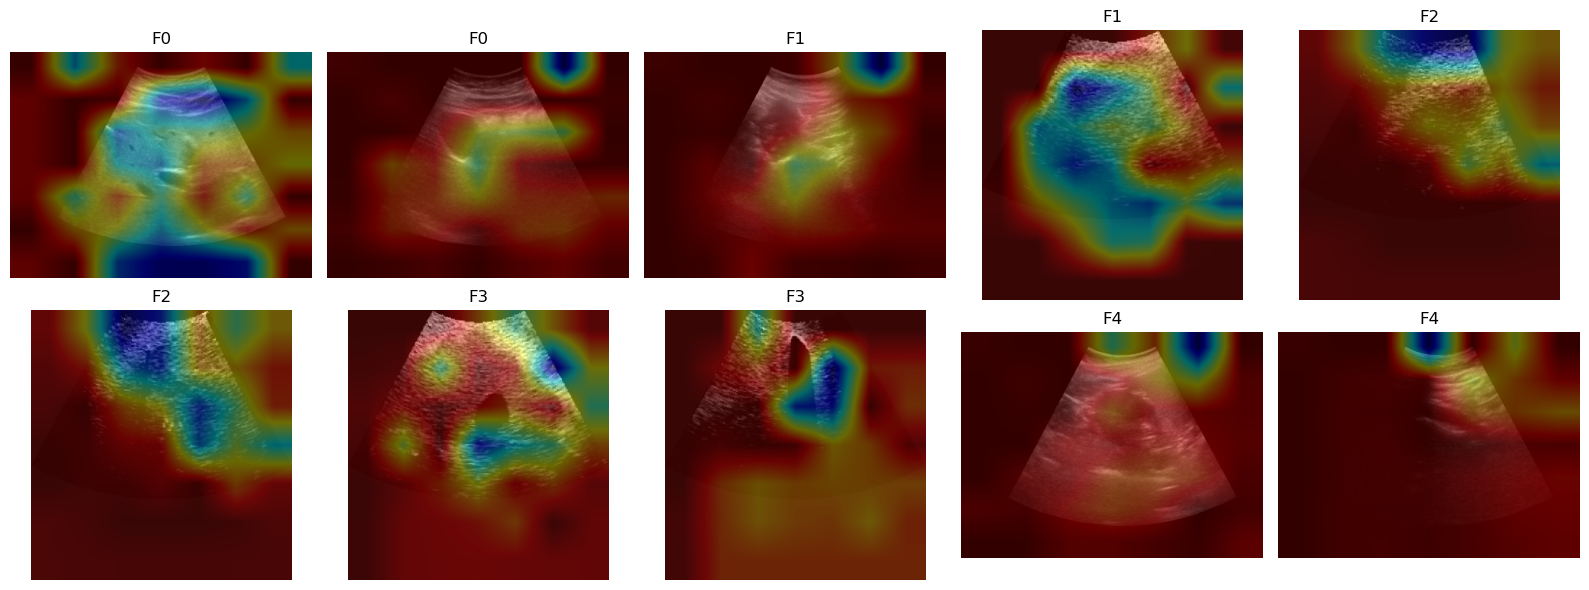

In [16]:
# ============================
# Grad-CAM for ResNet-50 (torchvision or custom)
# ============================
import os, random
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50
from PIL import Image
import torch.nn as nn

# ---- (OPTIONAL) If you built your own ResNet-50 earlier, import it here ----
# from your_model_file import resnet50_scratch  # uncomment if using your custom model

# ----------------------------
# Grad-CAM class (full backward hook)
# ----------------------------
class GradCAM:
    def __init__(self, model, target_layer, device):
        self.model = model
        self.model.eval()
        self.device = device
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, inp, out):
            self.activations = out.detach()

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        if hasattr(self.target_layer, "register_full_backward_hook"):
            self.target_layer.register_full_backward_hook(backward_hook)
        else:
            self.target_layer.register_backward_hook(backward_hook)  # fallback for older PyTorch

    def generate(self, input_tensor, class_idx=None):
        input_tensor = input_tensor.to(self.device)

        # clear stale grads, forward, pick class
        self.model.zero_grad(set_to_none=True)
        output = self.model(input_tensor)  # [1, num_classes]
        if class_idx is None:
            class_idx = int(output.argmax(dim=1).item())

        # backward on the chosen logit
        class_score = output[0, class_idx]
        class_score.backward()

        # Grad-CAM
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)  # [1, C, 1, 1]
        gradcam = (weights * self.activations).sum(dim=1, keepdim=True)  # [1,1,H,W]
        gradcam = F.relu(gradcam)
        gradcam = F.interpolate(gradcam, size=input_tensor.shape[2:], mode="bilinear", align_corners=False)

        heatmap = gradcam.squeeze().cpu().numpy()
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
        return heatmap

# ----------------------------
# Overlay heatmap on image
# ----------------------------
def show_gradcam_on_image(img_path, heatmap, title=""):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)
    plt.imshow(superimposed)
    plt.title(title)
    plt.axis("off")

# ----------------------------
# Load your trained model
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 5  # F0–F4  <-- must match training

# ==== Choose ONE of these ====
USE_TORCHVISION = True   # True: torchvision resnet50; False: your custom resnet50_scratch

if USE_TORCHVISION:
    model = resnet50(weights=None, num_classes=num_classes)
else:
    # model = resnet50_scratch(num_classes=num_classes)  # uncomment if you have your own implementation
    raise RuntimeError("Set USE_TORCHVISION=True or import and instantiate your custom resnet50_scratch.")

# Robust checkpoint loading (handles plain state_dict or common checkpoint dict keys)
ckpt = torch.load("best_model.pth", map_location=device)
if isinstance(ckpt, dict) and any(k in ckpt for k in ["state_dict", "model_state_dict"]):
    state = ckpt.get("state_dict", ckpt.get("model_state_dict"))
else:
    state = ckpt
missing, unexpected = model.load_state_dict(state, strict=False)
if missing or unexpected:
    print("[Grad-CAM] Warning: state_dict mismatch.",
          "\n  Missing keys:", missing, "\n  Unexpected keys:", unexpected)

model.to(device).eval()

# Target layer for Grad-CAM (last bottleneck block works well)
# You can also try model.layer4[-1].conv3 for slightly crisper maps
target_layer = model.layer4[-1]
gradcam = GradCAM(model, target_layer, device)

# ----------------------------
# Preprocessing (ImageNet-style)
# ----------------------------
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ----------------------------
# Sample images from a single dataset root
# ----------------------------
root_dir = r"E:\resnet50+cbam\Dataset"  # single folder with class subfolders

def list_class_dirs(root):
    return [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

def list_images(dir_path):
    exts = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
    return [f for f in os.listdir(dir_path) if os.path.splitext(f)[1].lower() in exts]

random.seed(42)
classes = list_class_dirs(root_dir)
samples_per_class = 2  # 2 per class -> with 5 classes you'll get ~10 images
all_samples = []
for cls in classes:
    cls_dir = os.path.join(root_dir, cls)
    imgs = list_images(cls_dir)
    if not imgs:
        continue
    pick = random.sample(imgs, k=min(samples_per_class, len(imgs)))
    for fname in pick:
        all_samples.append((os.path.join(cls_dir, fname), cls))

# ----------------------------
# Run Grad-CAM and show results
# ----------------------------
cols = 5
rows = max(1, (len(all_samples) + cols - 1) // cols)
plt.figure(figsize=(3.2*cols, 3.0*rows))

for idx, (img_path, cls) in enumerate(all_samples, 1):
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)  # [1,3,224,224]

    heatmap = gradcam.generate(input_tensor)

    plt.subplot(rows, cols, idx)
    show_gradcam_on_image(img_path, heatmap, title=f"{cls}")

plt.tight_layout()
plt.show()


In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------
# Config
# ------------------------
LOG_FILE = "training-resnet50-no-aug-kfold.log"  # <- updated filename
TARGET_TOTAL_EPOCHS = 20                          # we’ll grab the last block where "Epoch x/20"

# ------------------------
# Step 1: Read log file
# ------------------------
with open(LOG_FILE, "r", encoding="utf-8") as f:
    log_text = f.read()

# ------------------------
# Step 2: Locate the last "Epoch 20/20" block
# ------------------------
# Find all "Epoch a/b" markers
epoch_iter = list(re.finditer(r"Epoch\s+(\d+)\s*/\s*(\d+)", log_text))
if not epoch_iter:
    raise ValueError("No 'Epoch x/y' markers found in the log.")

# Pick the last marker with total == TARGET_TOTAL_EPOCHS (else fall back to the last marker)
candidates = [m for m in epoch_iter if int(m.group(2)) == TARGET_TOTAL_EPOCHS]
chosen = (candidates[-1] if candidates else epoch_iter[-1])
start_idx = chosen.start()

# The end of this epoch block is the start of the next "Epoch a/b" (if any), else EOF
next_markers = [m for m in epoch_iter if m.start() > start_idx]
end_idx = next_markers[0].start() if next_markers else len(log_text)

epoch_block = log_text[start_idx:end_idx]

# ------------------------
# Step 3: Parse metrics (Train/Val)
# ------------------------
# Example line:
# "Train Loss: 0.2323 | Train Acc: 1.0000 | Val Loss: 0.5884 | Val Acc: 0.8362"
m = re.search(
    r"Train\s+Loss:\s*([0-9.]+)\s*\|\s*Train\s+Acc:\s*([0-9.]+)\s*\|\s*Val\s+Loss:\s*([0-9.]+)\s*\|\s*Val\s+Acc:\s*([0-9.]+)",
    epoch_block
)
if not m:
    raise ValueError("Could not find Train/Val metrics line in the chosen epoch block.")
train_loss = float(m.group(1))
train_acc = float(m.group(2)) * 100.0  # convert fraction -> percent
val_loss   = float(m.group(3))
val_acc    = float(m.group(4)) * 100.0  # convert fraction -> percent

# ------------------------
# Step 4: Parse Confusion Matrix (between 'Confusion Matrix:' and next 'Classification Report:')
# ------------------------
cm_match = re.search(
    r"Confusion\s+Matrix:\s*\n(.*?)\n\s*\d{4}-\d{2}-\d{2}.*?\|\s*INFO\s*\|\s*Classification\s+Report:",
    epoch_block,
    re.S
)
# Some logs may have "Confusion Matrix:" immediately followed by "Classification Report:" without a timestamp line,
# so fall back to a simpler boundary.
if not cm_match:
    cm_match = re.search(
        r"Confusion\s+Matrix:\s*\n(.*?)\n\s*Classification\s+Report:",
        epoch_block,
        re.S
    )
if not cm_match:
    raise ValueError("Could not extract confusion matrix text from the epoch block.")

cm_text = cm_match.group(1).strip()
# Extract rows (each line with [ ... ])
rows = [line for line in cm_text.splitlines() if "[" in line and "]" in line]
confusion_matrix = []
for line in rows:
    nums = re.findall(r"-?\d+", line)
    confusion_matrix.append([int(x) for x in nums])

# ------------------------
# Step 5: Parse Classification Report (block after 'Classification Report:')
# ------------------------
# Grab from "Classification Report:" to the next timestamped line or EOF
cr_match = re.search(
    r"Classification\s+Report:\s*\n(.*?)(?:\n\s*\d{4}-\d{2}-\d{2}.*?\|\s*INFO\s*\||\Z)",
    epoch_block,
    re.S
)
if not cr_match:
    # Fallback: until double newline or end
    cr_match = re.search(
        r"Classification\s+Report:\s*\n(.*?)(?:\n\s*\n|\Z)",
        epoch_block,
        re.S
    )
if not cr_match:
    raise ValueError("Could not extract classification report from the epoch block.")
report_block = cr_match.group(1)

# Clean lines and keep only rows that look like: "<label> <prec> <rec> <f1> <support>"
lines = [ln.strip() for ln in report_block.splitlines() if ln.strip()]
classes, prec, rec, f1 = [], [], [], []
for ln in lines:
    # skip headers and summary rows
    if ln.startswith(("precision", "recall", "f1-score", "support")):
        continue
    if ln.startswith(("accuracy", "macro avg", "weighted avg")):
        continue
    parts = ln.split()
    # Expect: label, precision, recall, f1, support
    if len(parts) >= 5:
        label = parts[0]
        try:
            p = float(parts[1]); r = float(parts[2]); f1s = float(parts[3])
        except ValueError:
            continue
        classes.append(label)
        prec.append(p)
        rec.append(r)
        f1.append(f1s)

df_report = pd.DataFrame(
    {"Precision": prec, "Recall": rec, "F1-score": f1},
    index=classes
)

# ------------------------
# Step 6: Plots
# ------------------------
# Accuracy (percent)
plt.figure(figsize=(6,4))
plt.bar(["Train Acc", "Val Acc"], [train_acc, val_acc], color=["blue", "orange"])
plt.ylabel("Accuracy (%)")
# Use the epoch number in the title
epoch_num, total_epochs = chosen.groups()
plt.title(f"Accuracy (Epoch {epoch_num}/{total_epochs})")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.bar(["Train Loss", "Val Loss"], [train_loss, val_loss], color=["green", "red"])
plt.ylabel("Loss")
plt.title(f"Loss (Epoch {epoch_num}/{total_epochs})")
plt.tight_layout()
plt.show()

# Precision per class
ax = df_report["Precision"].plot(kind="bar", figsize=(8,6), color="skyblue")
plt.title(f"Precision per class (Epoch {epoch_num}/{total_epochs})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

# Recall per class
df_report["Recall"].plot(kind="bar", figsize=(8,6), color="orange")
plt.title(f"Recall per class (Epoch {epoch_num}/{total_epochs})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Recall")
plt.tight_layout()
plt.show()

# F1-score per class
df_report["F1-score"].plot(kind="bar", figsize=(8,6), color="green")
plt.title(f"F1-score per class (Epoch {epoch_num}/{total_epochs})")
plt.ylim(0.0, 1.05)
plt.xticks(rotation=0)
plt.ylabel("F1-score")
plt.tight_layout()
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title(f"Confusion Matrix (Epoch {epoch_num}/{total_epochs})")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


ValueError: Epoch 20/20 not found in log.